## Step 1: Reading and Understanding the Data

In [371]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

# Supressing warnings
import warnings
warnings.filterwarnings(action='ignore')

In [372]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [374]:
# Check for duplicates across all columns
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(duplicates)

No duplicates found.


In [375]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [376]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [377]:
# Dropping index, casual and registered columns
df.drop('instant', axis=1, inplace=True)
df.drop('casual', axis=1, inplace=True)
df.drop('registered', axis=1, inplace=True)
df.drop('dteday', axis=1, inplace=True)

In [378]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [379]:
# Renaming columns
df = df.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'})

In [380]:
# Mapping the values into the categorical columns
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [381]:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

In [382]:
cont_cols=["temp","atemp","humidity","windspeed"] 
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"] 
target=["cnt"] 
numeric_col=["temp","atemp","humidity","windspeed","cnt"] 
len(cont_cols)+len(cat_cols)+len(target)

12

## Step 2: Visualising the Data

## Univariate Analysis

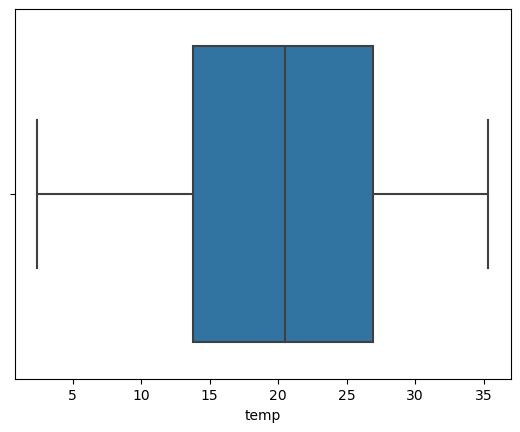

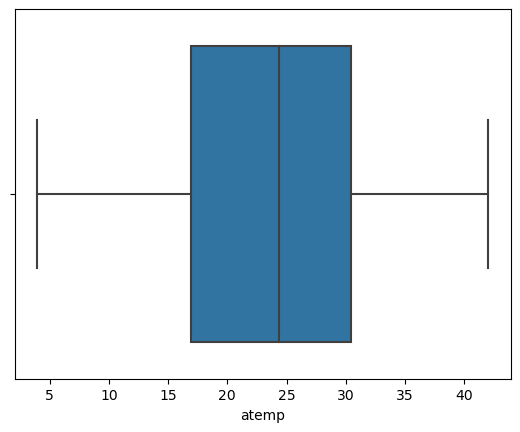

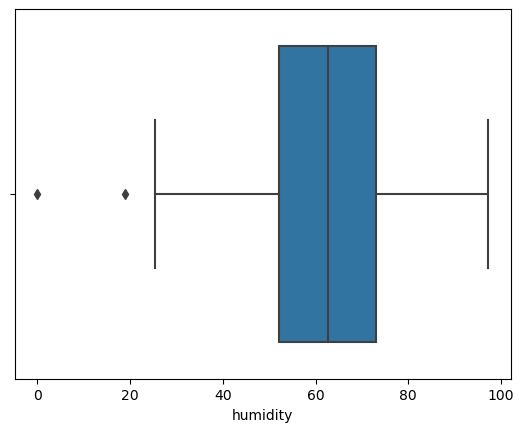

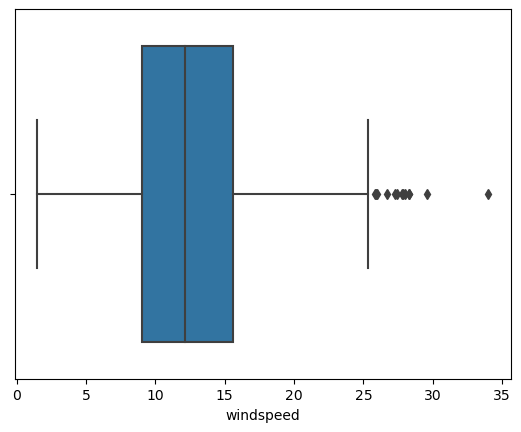

In [383]:
# Create boxplots for continous columns
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.show()

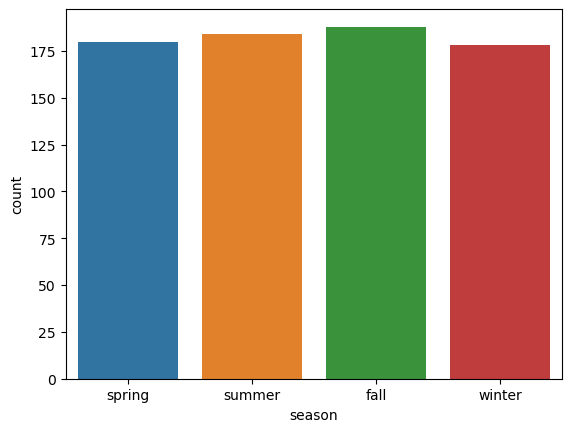

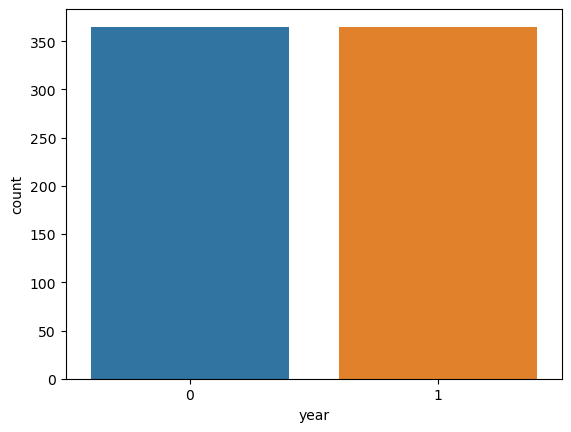

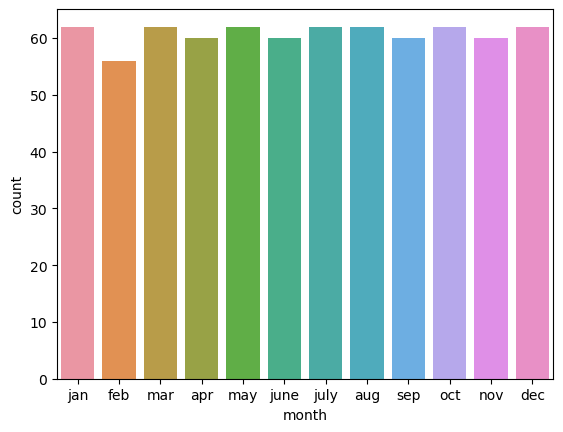

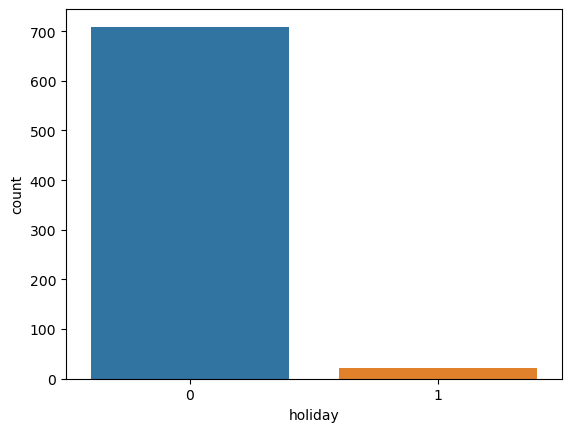

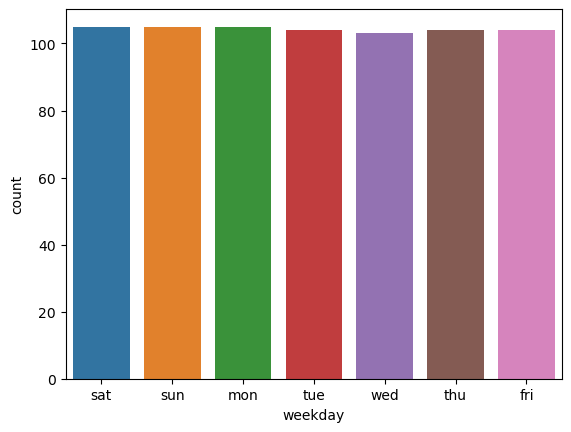

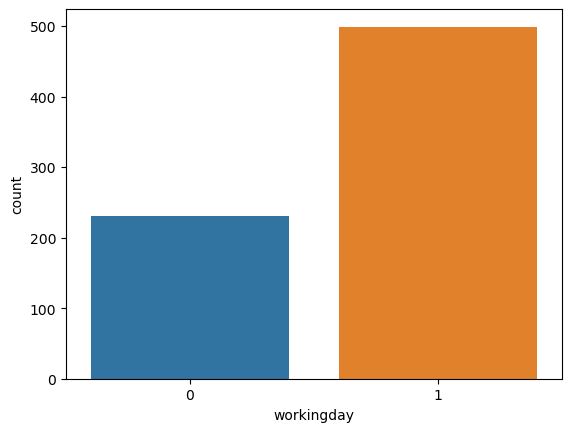

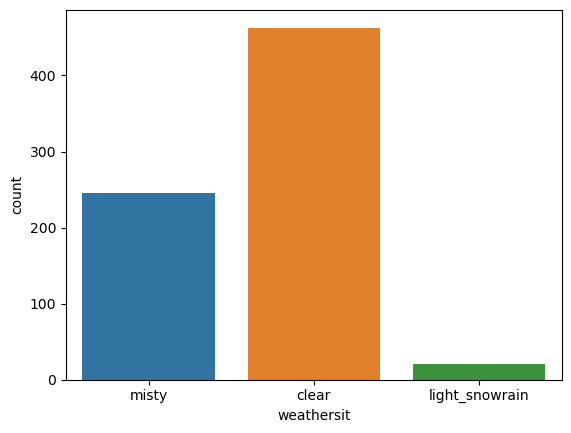

In [384]:
# Create countplot for categorical columns
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

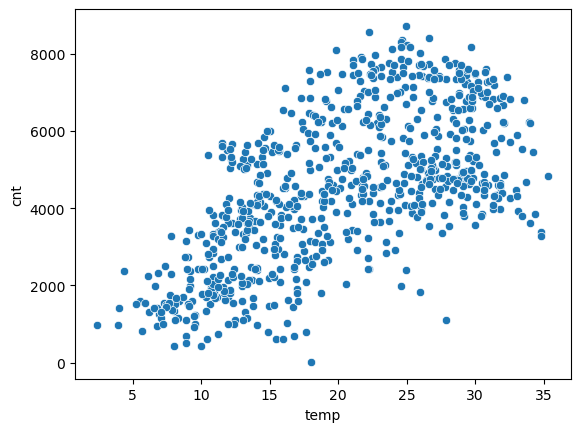

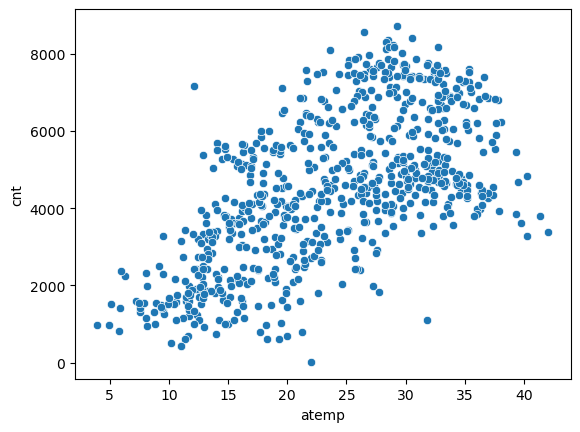

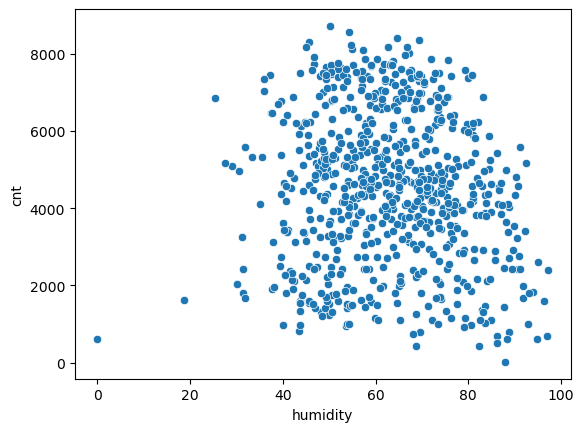

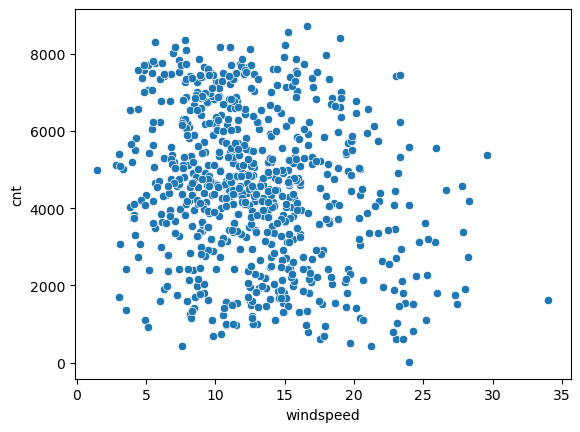

In [385]:
for i in cont_cols:
    sns.scatterplot(x=df[i], y=df['cnt'])
    plt.show()

A positive trend can be seen for temp and atemp wrt cnt.

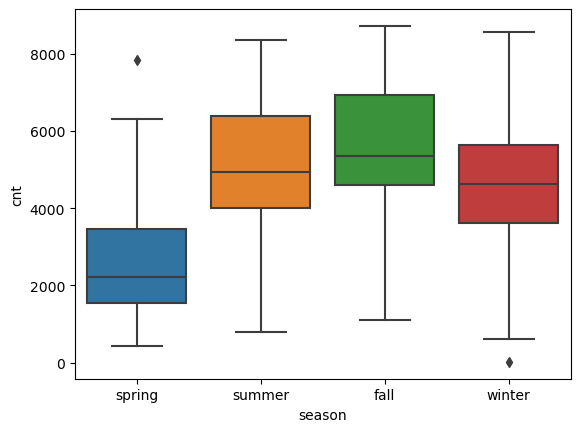

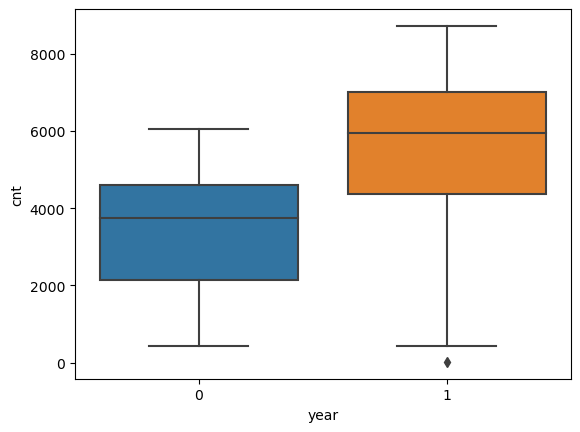

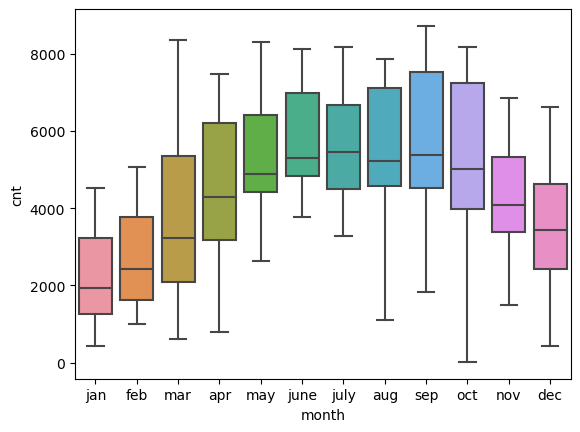

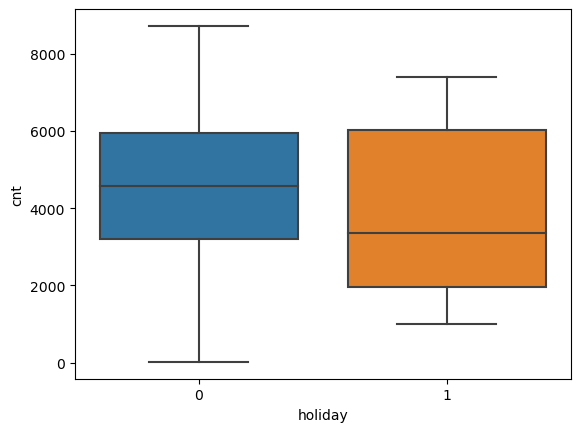

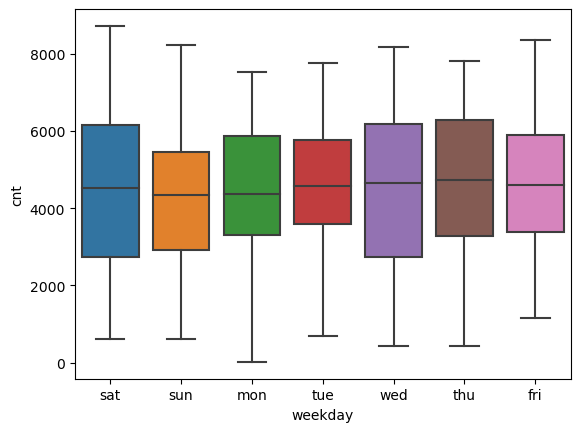

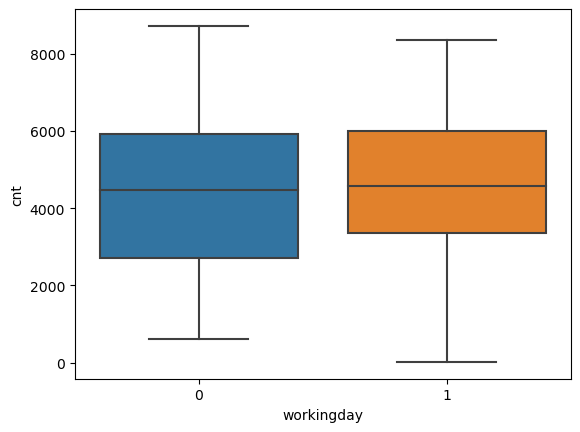

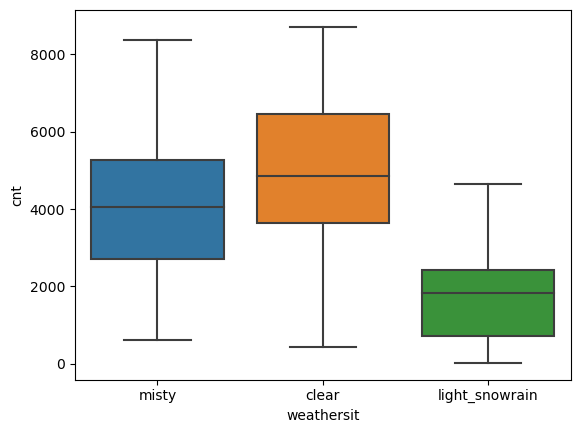

In [386]:
for i in cat_cols:
    sns.boxplot(x=df[i], y=df['cnt'])
    plt.show()

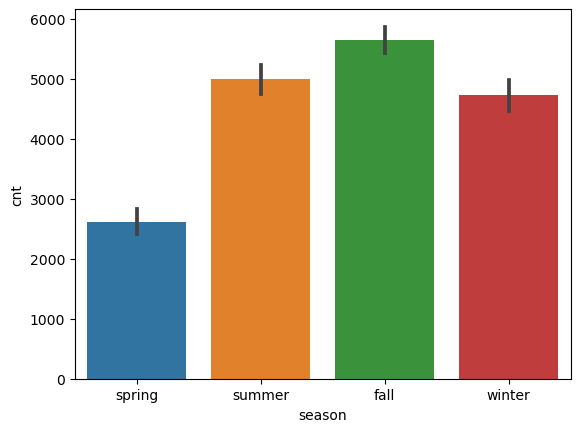

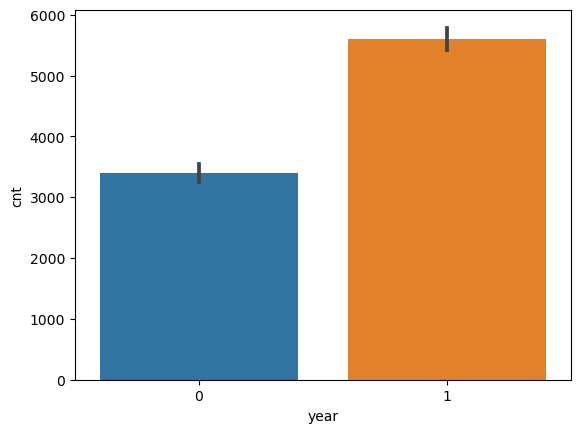

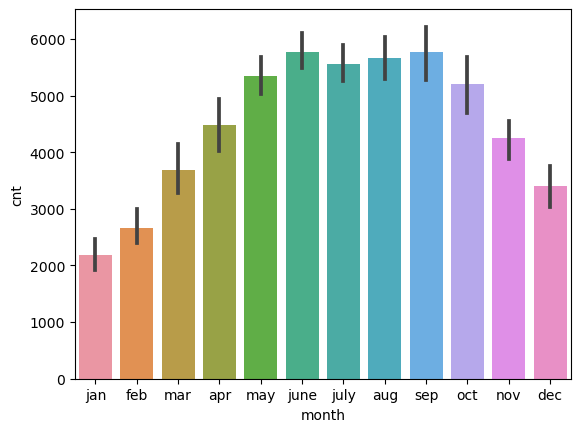

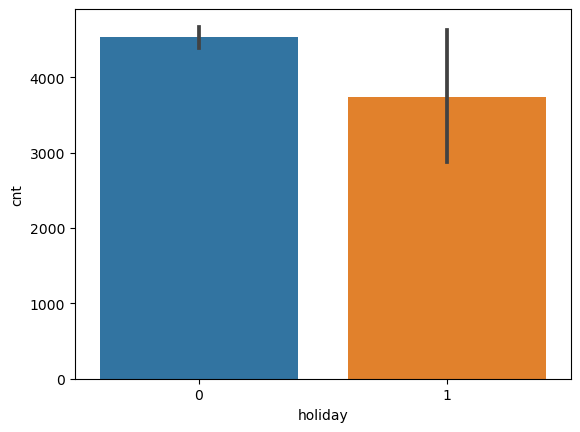

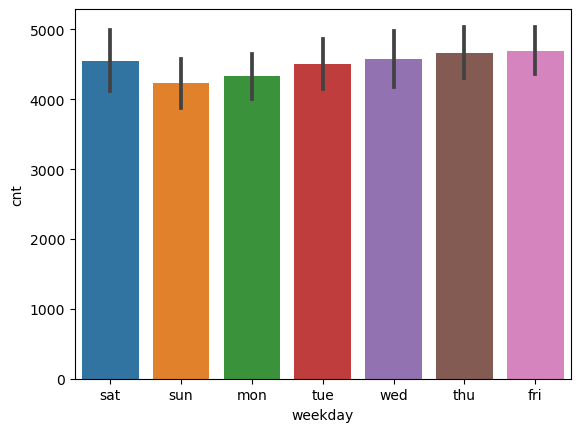

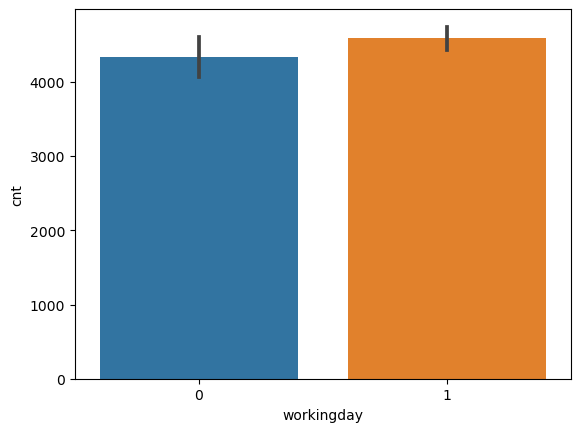

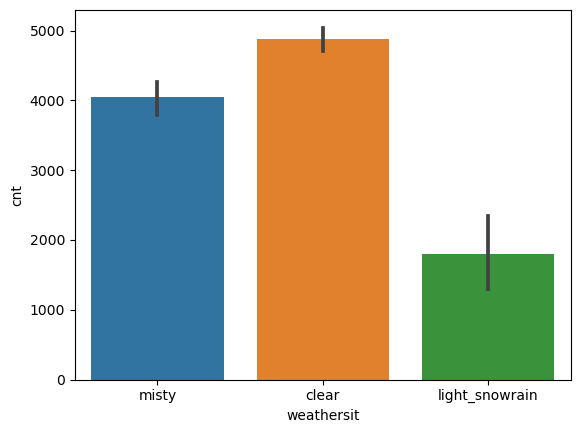

In [387]:
for i in cat_cols:
    sns.barplot(x=df[i], y=df['cnt'], data=df)
    plt.show()

- Count of total rental bikes is seen to be high on the fall season.
- Business is doing better in 2019 wrt 2018.
- September has highest number of bookings while median for bike rental count is highest for July. Trend of booking bikes increases from July and by October the booking trend decreases as winter approaches.
- Thursday, Friday, Saturday have more rentals.
- There are less renatls on holidays than non holidays.
- In Clear, Few clouds, Partly cloudy, Partly cloudy weather conditions, tehre are more bookings.

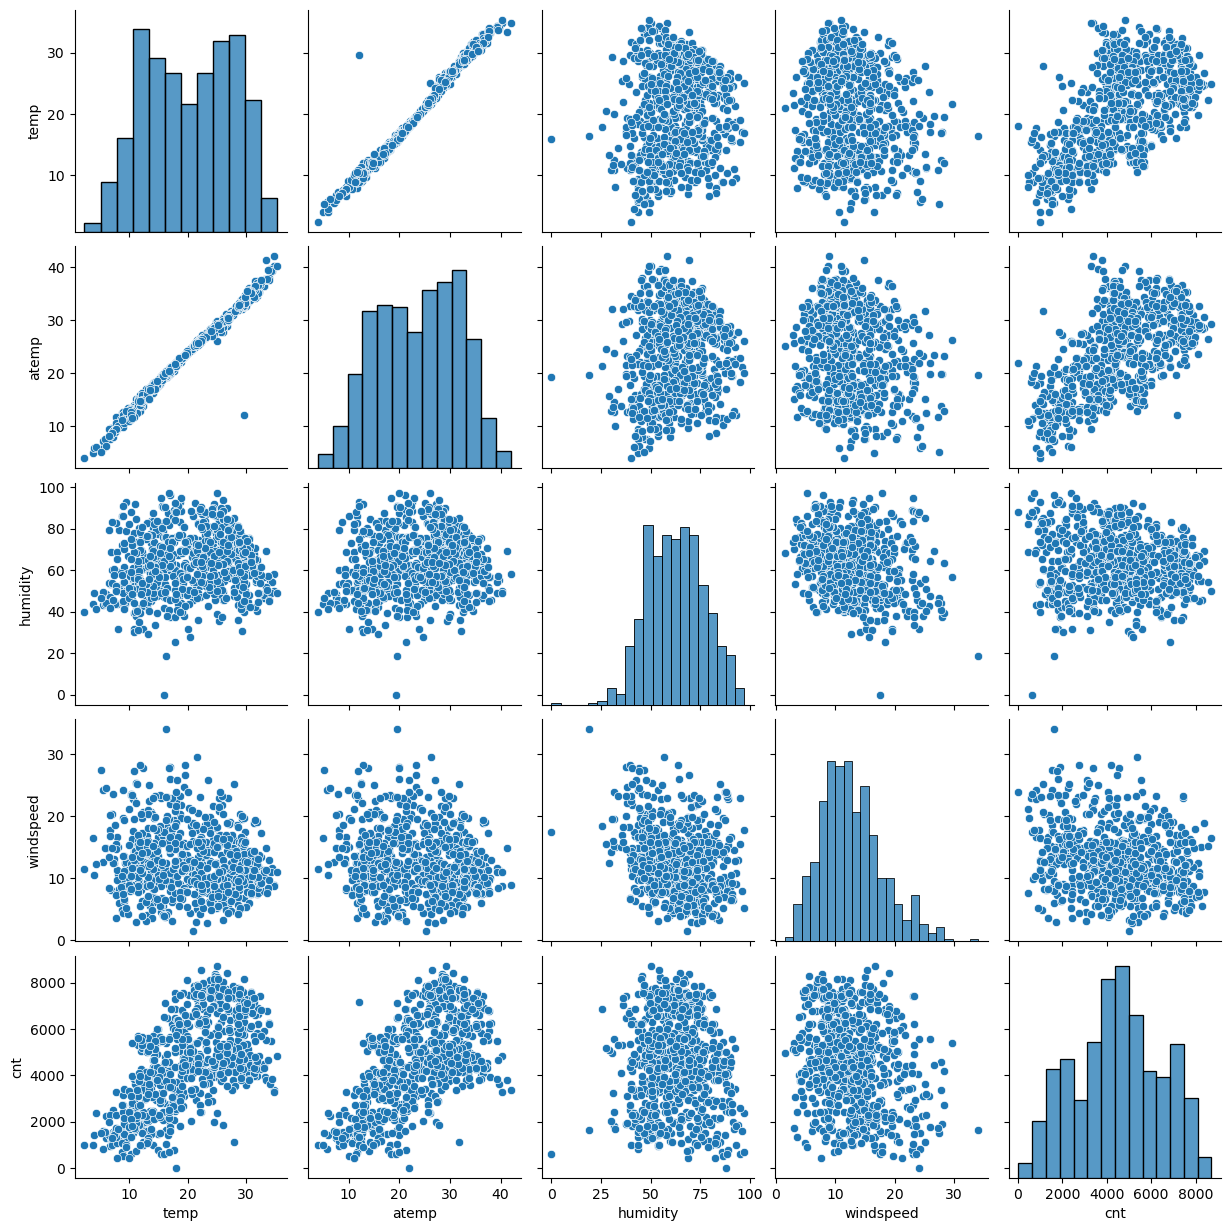

In [388]:
# Analysing/visualizing the numerical columns
cols_to_plot = cont_cols + ["cnt"]
sns.pairplot(data=df,vars = cols_to_plot)
plt.show()

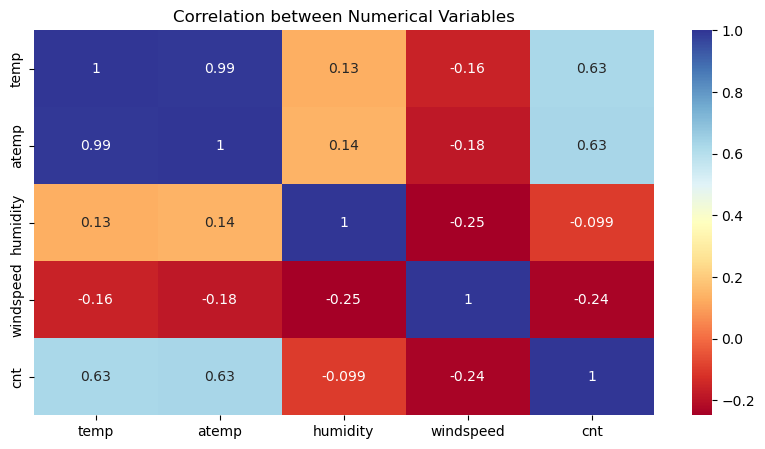

In [389]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cols_to_plot].corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation between Numerical Variables")
plt.show()

#### A linear relationship can be observed between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [390]:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

## Step 3: Data Preparation

In [391]:
# Creating dummies for categorical variables having more than 2 values
dum_season = pd.get_dummies(df["season"], drop_first=True)
dum_month = pd.get_dummies(df["month"], drop_first=True)
dum_weekday = pd.get_dummies(df["weekday"], drop_first=True)
dum_weathersit = pd.get_dummies(df["weathersit"], drop_first=True)

In [392]:
# Concating the dummy dataframes with original dataframe 
df1 = pd.concat([df,dum_season,dum_month,dum_weekday,dum_weathersit],axis=1)

In [393]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [394]:
# Dropping the categorical columns from where dummy variables are created
columns_to_drop = ['season', 'month','weekday','weathersit']
df1.drop(columns=columns_to_drop, axis=1, inplace = True)

In [395]:
df1.nunique()

year                2
holiday             2
workingday          2
temp              498
atemp             689
humidity          594
windspeed         649
cnt               695
spring              2
summer              2
winter              2
aug                 2
dec                 2
feb                 2
jan                 2
july                2
june                2
mar                 2
may                 2
nov                 2
oct                 2
sep                 2
mon                 2
sat                 2
sun                 2
thu                 2
tue                 2
wed                 2
light_snowrain      2
misty               2
dtype: int64

## Step 4: Splitting the Data into Training and Testing Sets

In [396]:
df_train, df_test = train_test_split(df1, train_size=0.7, test_size=0.3, random_state=101)

Rescaling the features using MinMax scaling

In [397]:
scaler = MinMaxScaler()

In [398]:
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.027451,0.676471,0.542359,0.518543,0.560420,0.342352,0.524230,0.254902,0.250980,...,0.084314,0.082353,0.145098,0.156863,0.139216,0.158824,0.137255,0.135294,0.029412,0.327451
std,0.500395,0.163554,0.468282,0.229123,0.214342,0.180231,0.162937,0.227078,0.436234,0.434003,...,0.278131,0.275172,0.352545,0.364028,0.346511,0.365870,0.344454,0.342373,0.169124,0.469744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344007,0.339750,0.427182,0.224692,0.374810,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.516890,0.564962,0.318604,0.525958,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742483,0.695494,0.691027,0.434629,0.691023,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X and y sets for model building

In [399]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building model using RFE

In [400]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [401]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('aug', False, 11),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 5),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 3),
 ('sun', False, 6),
 ('thu', False, 15),
 ('tue', False, 10),
 ('wed', False, 13),
 ('light_snowrain', True, 1),
 ('misty', True, 1)]

In [402]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'spring', 'winter',
       'dec', 'feb', 'jan', 'july', 'nov', 'sep', 'light_snowrain', 'misty'],
      dtype='object')

In [403]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'summer', 'aug', 'june', 'mar', 'may', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building a model using statsmodel, for detailed statistics

In [404]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

In [405]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_1)

In [406]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [407]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     167.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.23e-182
Time:                        21:40:01   Log-Likelihood:                 492.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     494   BIC:                            -885.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3878      0.033     11.895      0.000       0.324       0.452
year               0.2374      0.008     27.957      0.000       0.221       0.254
holiday           -0.1010      0.026     -3.944      0.000      -0.151      -0.051
atemp              0.4297      0.038     11.281      0.000       0.355       0.504
humidity          -0.1585      0.034     -4.617      0.000      -0.226      -0.091
windspeed         -0.1809      0.029     -6.311      0.000      -0.237      -0.125
spring            -0.0952      0.018     -5.201      0.000      -0.131      -0.059
winter             0.0812      0.015      5.576      0.000       0.053       0.110
dec               -0.0800      0.019     -4.276      0.000      -0.117      -0.043
feb               -0.0578      0.021     -2.695      0.007      -0.100      -0.016
jan               -0.0753      0.022     -3.465      0.001      -0.118      -0.033
july              -0.0630      0.017     -3.632      0.000      -0.097      -0.029
nov               -0.0845      0.020     -4.150      0.000      -0.124      -0.044
sep                0.0525      0.016      3.272      0.001       0.021       0.084
light_snowrain    -0.2292      0.029     -7.795      0.000      -0.287      -0.171
misty             -0.0521      0.012     -4.530      0.000      -0.075      -0.030
==============================================================================
Omnibus:                       86.473   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.054
Skew:                          -0.845   Prob(JB):                     1.35e-49
Kurtosis:                       5.781   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [408]:
# Function to calculate VIF
def calculate_vif(data):
    # Create a DataFrame to store the VIF results
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif_data = vif_data.sort_values(by = "VIF", ascending = False)
    return vif_data

In [409]:
calculate_vif(X_train_1)

,Feature,VIF
3,humidity,18.764226
2,atemp,14.409133
4,windspeed,4.535747
5,spring,4.198265
6,winter,2.732834
14,misty,2.500796
9,jan,2.248506
0,year,2.118129
8,feb,2.036890
11,nov,1.717137


- VIF of humidity is very high. Dropping it

In [410]:
X_train_2 = X_train_1.drop(['humidity'], axis = 1)

In [411]:
X_train_rfe2 = sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          5.40e-179
Time:                        21:40:01   Log-Likelihood:                 482.03
No. Observations:                 510   AIC:                            -934.1
Df Residuals:                     495   BIC:                            -870.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3186      0.030     10.785      0.000       0.261       0.377
year               0.2439      0.009     28.558      0.000       0.227       0.261
holiday           -0.1046      0.026     -4.006      0.000      -0.156      -0.053
atemp              0.3916      0.038     10.322      0.000       0.317       0.466
windspeed         -0.1415      0.028     -5.067      0.000      -0.196      -0.087
spring            -0.0995      0.019     -5.339      0.000      -0.136      -0.063
winter             0.0718      0.015      4.878      0.000       0.043       0.101
dec               -0.0862      0.019     -4.531      0.000      -0.124      -0.049
feb               -0.0549      0.022     -2.509      0.012      -0.098      -0.012
jan               -0.0780      0.022     -3.518      0.000      -0.122      -0.034
july              -0.0535      0.018     -3.046      0.002      -0.088      -0.019
nov               -0.0871      0.021     -4.194      0.000      -0.128      -0.046
sep                0.0428      0.016      2.634      0.009       0.011       0.075
light_snowrain    -0.2988      0.026    -11.591      0.000      -0.349      -0.248
misty             -0.0840      0.009     -8.960      0.000      -0.102      -0.066
==============================================================================
Omnibus:                       87.460   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.065
Skew:                          -0.848   Prob(JB):                     4.05e-51
Kurtosis:                       5.836   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
X_train_3 = X_train_2.drop(['feb'], axis = 1)

In [413]:
X_train_rfe3 = sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train, X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          8.84e-179
Time:                        21:40:01   Log-Likelihood:                 478.81
No. Observations:                 510   AIC:                            -929.6
Df Residuals:                     496   BIC:                            -870.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3051      0.029     10.448      0.000       0.248       0.363
year               0.2430      0.009     28.324      0.000       0.226       0.260
holiday           -0.1072      0.026     -4.083      0.000      -0.159      -0.056
atemp              0.4110      0.037     11.005      0.000       0.338       0.484
windspeed         -0.1387      0.028     -4.945      0.000      -0.194      -0.084
spring            -0.1213      0.017     -7.305      0.000      -0.154      -0.089
winter             0.0703      0.015      4.755      0.000       0.041       0.099
dec               -0.0724      0.018     -3.954      0.000      -0.108      -0.036
jan               -0.0478      0.019     -2.554      0.011      -0.085      -0.011
july              -0.0564      0.018     -3.200      0.001      -0.091      -0.022
nov               -0.0801      0.021     -3.870      0.000      -0.121      -0.039
sep                0.0430      0.016      2.636      0.009       0.011       0.075
light_snowrain    -0.2981      0.026    -11.507      0.000      -0.349      -0.247
misty             -0.0827      0.009     -8.785      0.000      -0.101      -0.064
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.363
Skew:                          -0.776   Prob(JB):                     4.20e-45
Kurtosis:                       5.685   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [414]:
X_train_4 = X_train_3.drop(['jan'], axis = 1)

In [415]:
X_train_rfe4 = sm.add_constant(X_train_4)
lm4 = sm.OLS(y_train, X_train_rfe4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.57e-178
Time:                        21:40:01   Log-Likelihood:                 475.47
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     497   BIC:                            -869.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2852      0.028     10.079      0.000       0.230       0.341
year               0.2429      0.009     28.160      0.000       0.226       0.260
holiday           -0.1106      0.026     -4.197      0.000      -0.162      -0.059
atemp              0.4374      0.036     12.121      0.000       0.366       0.508
windspeed         -0.1295      0.028     -4.629      0.000      -0.184      -0.075
spring            -0.1298      0.016     -7.941      0.000      -0.162      -0.098
winter             0.0716      0.015      4.826      0.000       0.042       0.101
dec               -0.0619      0.018     -3.451      0.001      -0.097      -0.027
july              -0.0607      0.018     -3.440      0.001      -0.095      -0.026
nov               -0.0741      0.021     -3.586      0.000      -0.115      -0.034
sep                0.0428      0.016      2.608      0.009       0.011       0.075
light_snowrain    -0.2980      0.026    -11.436      0.000      -0.349      -0.247
misty             -0.0830      0.009     -8.765      0.000      -0.102      -0.064
==============================================================================
Omnibus:                       76.413   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.500
Skew:                          -0.761   Prob(JB):                     1.58e-42
Kurtosis:                       5.596   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
calculate_vif(X_train_4)

,Feature,VIF
2,atemp,4.937398
3,windspeed,4.506826
5,winter,2.396207
0,year,2.073890
4,spring,1.718604
8,nov,1.661688
11,misty,1.500043
6,dec,1.427338
7,july,1.409535
9,sep,1.213778


In [417]:
X_train_5 = X_train_4.drop(['sep'], axis = 1)

In [418]:
X_train_rfe5 = sm.add_constant(X_train_5)
lm5 = sm.OLS(y_train, X_train_rfe5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          3.06e-178
Time:                        21:40:01   Log-Likelihood:                 472.01
No. Observations:                 510   AIC:                            -920.0
Df Residuals:                     498   BIC:                            -869.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2866      0.028     10.072      0.000       0.231       0.342
year               0.2424      0.009     27.948      0.000       0.225       0.259
holiday           -0.1099      0.027     -4.146      0.000      -0.162      -0.058
atemp              0.4482      0.036     12.432      0.000       0.377       0.519
windspeed         -0.1358      0.028     -4.843      0.000      -0.191      -0.081
spring            -0.1315      0.016     -8.003      0.000      -0.164      -0.099
winter             0.0741      0.015      4.969      0.000       0.045       0.103
dec               -0.0663      0.018     -3.689      0.000      -0.102      -0.031
july              -0.0690      0.017     -3.955      0.000      -0.103      -0.035
nov               -0.0803      0.021     -3.888      0.000      -0.121      -0.040
light_snowrain    -0.2936      0.026    -11.226      0.000      -0.345      -0.242
misty             -0.0826      0.010     -8.674      0.000      -0.101      -0.064
==============================================================================
Omnibus:                       79.430   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.567
Skew:                          -0.786   Prob(JB):                     1.03e-44
Kurtosis:                       5.657   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [419]:
calculate_vif(X_train_5)

,Feature,VIF
2,atemp,4.546161
3,windspeed,4.470994
5,winter,2.381759
0,year,2.073020
4,spring,1.716221
8,nov,1.640361
10,misty,1.499348
6,dec,1.415409
7,july,1.360942
9,light_snowrain,1.086093


## Step 6: Residual Analysis of the train data and validation

In [420]:
X_train_rfe5

,const,year,holiday,atemp,windspeed,spring,winter,dec,july,nov,light_snowrain,misty
53,1.0,0,0,0.218747,0.147857,1,0,0,0,0,0,0
117,1.0,0,0,0.656133,0.615407,0,0,0,0,0,0,1
712,1.0,1,0,0.282377,0.224374,0,1,1,0,0,0,0
60,1.0,0,0,0.316347,0.588452,1,0,0,0,0,0,0
72,1.0,0,0,0.332005,0.236118,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,1,0,0.254194,0.448714,1,0,0,0,0,0,0
75,1.0,0,0,0.434828,0.385896,1,0,0,0,0,0,0
599,1.0,1,0,0.732369,0.128237,0,0,0,0,0,0,0
575,1.0,1,0,0.795348,0.270528,0,0,0,1,0,0,0


In [421]:
y_train_pred = lm5.predict(X_train_rfe5)

#### Normality of error terms

Text(0.5, 0, 'Errors')

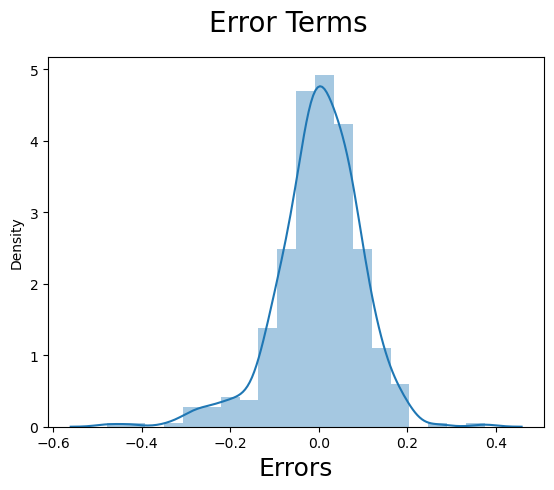

In [422]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

- Error terms are having a normal distribution

#### Multi Colinearity

In [423]:
calculate_vif(X_train_5)

,Feature,VIF
2,atemp,4.546161
3,windspeed,4.470994
5,winter,2.381759
0,year,2.073020
4,spring,1.716221
8,nov,1.640361
10,misty,1.499348
6,dec,1.415409
7,july,1.360942
9,light_snowrain,1.086093


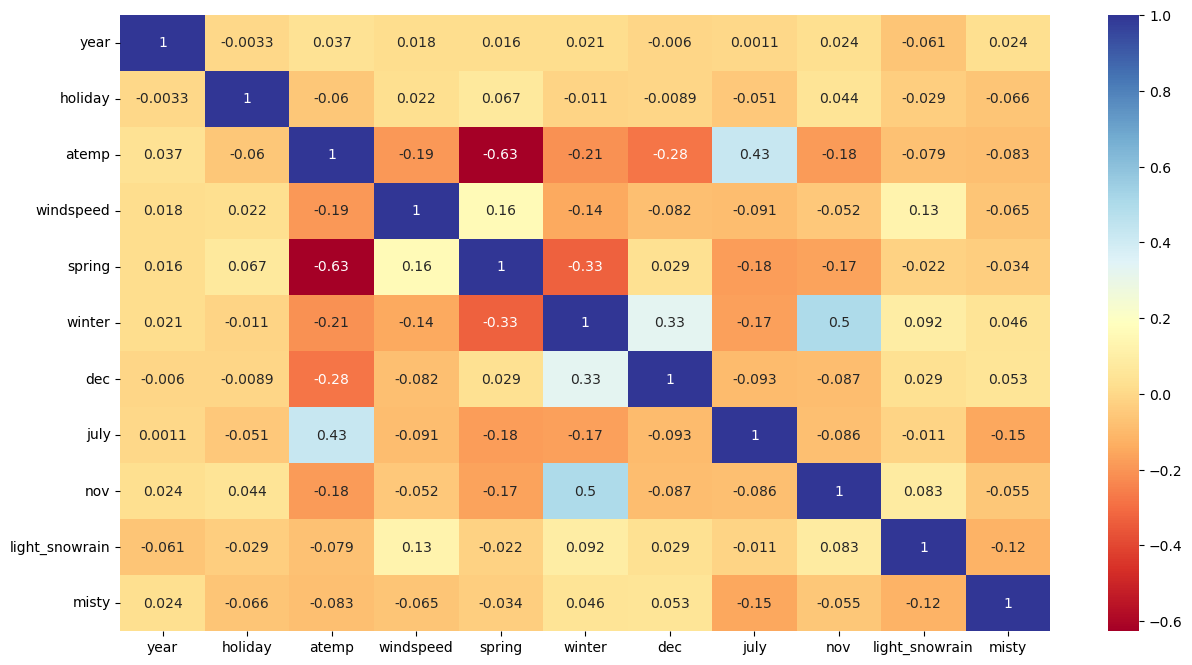

In [424]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_5.corr(),annot = True, cmap="RdYlBu")
plt.show()

#### Homoscedasticity

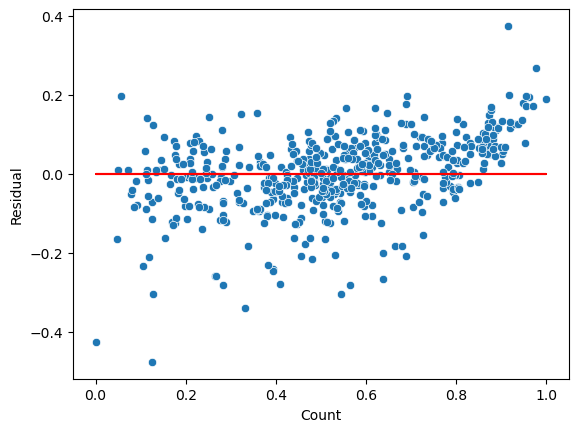

In [425]:
y_train_pred = lm5.predict(X_train_rfe5)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Durbin-Watson value of 	1.875, indicates that there is no first-order autocorrelation

## Step 7: Making Predictions Using the Final Model

We have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

In [426]:
df_test[numeric_col] = scaler.transform(df_test[numeric_col])
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.698630,0.546455,0.519627,0.566483,0.356529,0.527477,0.228311,0.251142,...,0.086758,0.082192,0.141553,0.114155,0.155251,0.105023,0.155251,0.155251,0.027397,0.360731
std,0.500513,0.176306,0.459904,0.226486,0.213790,0.186134,0.152770,0.226008,0.420705,0.434663,...,0.282125,0.275286,0.349389,0.318728,0.362974,0.307285,0.362974,0.362974,0.163612,0.481313
min,0.000000,0.000000,0.000000,0.047675,0.048706,-0.240150,0.050010,0.068323,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352573,0.333037,0.423855,0.250654,0.345834,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.566998,0.556658,0.552716,0.343140,0.539904,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.695909,0.697550,0.435063,0.702625,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.980934,1.002662,0.864144,1.018634,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [427]:
y_test = df_test.pop('cnt')
X_test = df_test

In [428]:
col1 = X_train_5.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

In [429]:
y_test_pred = lm5.predict(X_test_lm5)

In [430]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8359

## Step 8: Model Evaluation

Graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

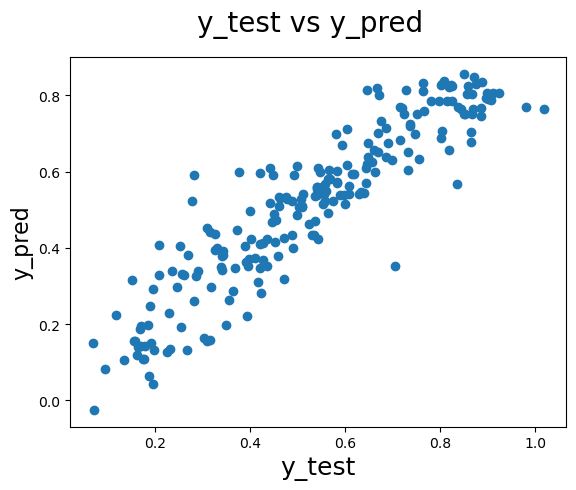

In [431]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [432]:
round(lm5.params,4)

const             0.2866
year              0.2424
holiday          -0.1099
atemp             0.4482
windspeed        -0.1358
spring           -0.1315
winter            0.0741
dec              -0.0663
july             -0.0690
nov              -0.0803
light_snowrain   -0.2936
misty            -0.0826
dtype: float64

cnt = 0.2866 + (0.2424 * year) - (0.1099 * holiday) + (0.4482 * atemp) - (0.1358 * windspeed) - (0.1315 * spring) + (0.0741 * winter) - (0.0663 * dec) -(0.0690 * july)-(0.0803 * nov)-(0.2936 * light_snowrain)-(0.0826 * misty)

In [433]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8272


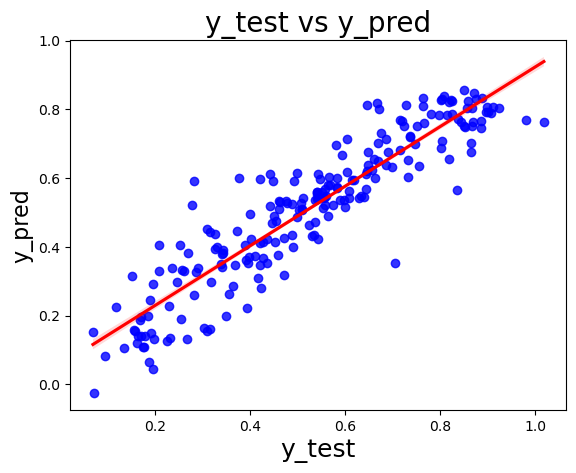

In [434]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.821
    - Test dataset R^2           : 0.8359
    - Train dataset Adjusted R^2 : 0.817   
    - Test dataset Adjusted R^2  : 0.8272


#### Demand of bikes depend on year, holiday, atemp, windspeed, spring,winter, dec, july, nov, light_snowrain and misty 